# LTR Example Machine Learning


# Importación de Librerías

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#import seaborn as sns; sns.set() 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lectura de Archivo

In [ ]:
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None


filename = '/content/drive/MyDrive/!UNAL/Introducción a las ciencias computacionales/Notebooks/Data/LTR-COD1.csv'
training_data = pd.read_csv(filename,delimiter=',',dtype='str')
training_data

,Label,B1,B2,B3,B4,B5,B6,B7,B8,B9,...,B15991,B15992,B15993,B15994,B15995,B15996,B15997,B15998,B15999,B16000
0,0,100,011,100,100,001,001,011,001,100,...,000,000,000,000,000,000,000,000,000,000
1,5,100,011,100,100,011,011,011,011,100,...,000,000,000,000,000,000,000,000,000,000
2,5,100,011,100,001,011,011,011,011,100,...,000,000,000,000,000,000,000,000,000,000
3,1,100,011,100,001,001,011,001,001,001,...,000,000,000,000,000,000,000,000,000,000
4,2,100,011,001,001,001,010,010,011,011,...,000,000,000,000,000,000,000,000,000,000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,10,100,011,100,100,011,010,011,011,001,...,000,000,000,000,000,000,000,000,000,000
1004,10,100,011,100,100,011,010,011,011,001,...,000,000,000,000,000,000,000,000,000,000
1005,10,100,011,100,100,011,010,011,011,001,...,000,000,000,000,000,000,000,000,000,000
1006,10,100,011,010,100,010,001,100,011,100,...,000,000,000,000,000,000,000,000,000,000


# Estadísticas Básicas de los datos de entrada

In [ ]:
training_data.describe()

,Label,B1,B2,B3,B4,B5,B6,B7,B8,B9,...,B15991,B15992,B15993,B15994,B15995,B15996,B15997,B15998,B15999,B16000
count,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,...,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008
unique,14,4,4,4,4,4,4,4,4,4,...,1,1,1,1,1,1,1,1,1,1
top,0,100,011,100,100,011,001,011,001,001,...,000,000,000,000,000,000,000,000,000,000
freq,72,890,922,620,653,482,379,461,404,290,...,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008


# Separación de clase y características

In [ ]:
type(training_data)

pandas.core.frame.DataFrame

In [ ]:
labels = training_data['Label'].values
features= training_data.drop(['Label'], axis=1)

In [ ]:
labels.astype('int').min()

0

In [ ]:
features

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B15991,B15992,B15993,B15994,B15995,B15996,B15997,B15998,B15999,B16000
0,100,011,100,100,001,001,011,001,100,100,...,000,000,000,000,000,000,000,000,000,000
1,100,011,100,100,011,011,011,011,100,001,...,000,000,000,000,000,000,000,000,000,000
2,100,011,100,001,011,011,011,011,100,001,...,000,000,000,000,000,000,000,000,000,000
3,100,011,100,001,001,011,001,001,001,001,...,000,000,000,000,000,000,000,000,000,000
4,100,011,001,001,001,010,010,011,011,010,...,000,000,000,000,000,000,000,000,000,000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,100,011,100,100,011,010,011,011,001,010,...,000,000,000,000,000,000,000,000,000,000
1004,100,011,100,100,011,010,011,011,001,010,...,000,000,000,000,000,000,000,000,000,000
1005,100,011,100,100,011,010,011,011,001,010,...,000,000,000,000,000,000,000,000,000,000
1006,100,011,010,100,010,001,100,011,100,001,...,000,000,000,000,000,000,000,000,000,000


# Imputación de datos (de ser necesario!!!)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(features)
features = imputer.transform(features)
features

array([[100.,  11., 100., ...,   0.,   0.,   0.],
       [100.,  11., 100., ...,   0.,   0.,   0.],
       [100.,  11., 100., ...,   0.,   0.,   0.],
       ...,
       [100.,  11., 100., ...,   0.,   0.,   0.],
       [100.,  11.,  10., ...,   0.,   0.,   0.],
       [100.,  11., 100., ...,   0.,   0.,   0.]])

# Descomposición en componentes principales (de ser necesario!!!)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=100)
pca.fit(features)
features_PCA = pca.transform(features)
features_PCA

array([[-8.43298778e+02,  2.26676880e+02,  4.04980573e+02, ...,
        -3.20635884e+01,  4.93995828e+01,  2.00355531e+01],
       [ 7.52943679e+02, -1.75740704e+02, -6.38178202e+02, ...,
         8.21713329e+01, -1.36297962e+02,  5.30008428e-02],
       [ 7.54055806e+02, -2.05054127e+02, -5.96179416e+02, ...,
         6.31386284e+01,  3.66508070e+01, -1.35625138e+02],
       ...,
       [-7.84903631e+02,  1.88091141e+02,  1.49139629e+02, ...,
         2.26547941e+01,  3.53034767e+00,  4.16859326e+01],
       [-4.39447488e+02,  2.60533763e+02, -1.83290368e+02, ...,
         4.18492592e+01, -1.77198695e+00, -9.14069178e+01],
       [-7.19478502e+02,  1.80355213e+02,  6.01172597e+01, ...,
        -4.97929831e+01, -2.38113119e+01,  9.03396215e+00]])

In [ ]:
features.shape, features_PCA.shape

((1008, 16000), (1008, 100))

# Escalamiento del vector de características (de ser necesario!!!)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(features)
features_scaler = scaler.transform(features)
#desde el PCA
scaler = preprocessing.StandardScaler().fit(features_PCA)
features_scaler_PCA = scaler.transform(features_PCA)

# Segmentación de los datos para entrenamiento y pruebas

In [ ]:
from sklearn.model_selection import train_test_split
validation_size = 0.2
seed = 0
X_train, X_validation, Y_train, Y_validation = train_test_split(features_PCA, labels, test_size=validation_size, random_state=seed)

In [ ]:
X_train.shape,Y_train.shape

((806, 100), (806,))

In [ ]:
X_train[0 :]

array([[ -504.23648227,   583.21218074,   177.26179779, ...,
           53.50979477,   -37.26811866,    66.19310152],
       [ -332.11086376,   587.53283459,   -20.26574455, ...,
          -47.9094104 ,   -40.79811207,    52.5249469 ],
       [-1427.67788515, -1162.13032586,  -478.08347963, ...,
            2.66442269,   -26.06517373,   -14.6012238 ],
       ...,
       [ 1029.5546613 ,   229.51689542,  -800.33115803, ...,
           58.8311993 ,  -111.77155774,  -165.71844937],
       [ 1757.0171427 ,  -502.86809235,    18.02509185, ...,
         -314.28028555,   387.55727451,   -96.79206743],
       [-1372.52857338, -1089.31420116,  -318.31641305, ...,
           67.85692632,    27.49712047,   -74.17206438]])

# 1. Algoritmo de KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
predictions = KNN.predict(X_validation)

# Resultados

In [ ]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

def resultados(Y_validation,predictions):
    conf = confusion_matrix(Y_validation, predictions)
    print ('Flow Pattern classification accuracy = %f' % accuracy(conf))

    print ('Accuracy:', accuracy_score(Y_validation, predictions))
    print ('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print ('Recall:', recall_score(Y_validation, predictions,
                              average='weighted'))
    print ('Precision:', precision_score(Y_validation, predictions,
                                    average='weighted'))
    print ('\n clasification report:\n', classification_report(Y_validation, predictions))
    print ('\n confussion matrix:\n',confusion_matrix(Y_validation, predictions))

In [ ]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.475248
Accuracy: 0.4752475247524752
F1 score: 0.4550222320233057
Recall: 0.4752475247524752
Precision: 0.5832606338741175

 clasification report:
               precision    recall  f1-score   support

           0       0.40      0.62      0.48        13
           1       0.33      0.38      0.35         8
          10       0.39      0.64      0.49        14
          11       0.86      1.00      0.93        19
          12       0.32      0.43      0.36        14
          13       0.71      0.59      0.65        17
           2       0.67      0.09      0.16        22
           3       0.20      0.08      0.11        13
           4       0.71      0.33      0.45        15
           5       0.26      0.92      0.40        12
           6       0.25      0.38      0.30         8
           7       0.75      0.40      0.52        15
           8       0.73      0.61      0.67        18
           9       1.00      0.14      0.25        14



# 2. Algoritmo de LR

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Resultados

In [ ]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.376238
Accuracy: 0.37623762376237624
F1 score: 0.38092492058647476
Recall: 0.37623762376237624
Precision: 0.40003361923134784

 clasification report:
               precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.08      0.12      0.10         8
          10       0.36      0.29      0.32        14
          11       0.80      0.84      0.82        19
          12       0.17      0.21      0.19        14
          13       0.36      0.29      0.32        17
           2       0.38      0.23      0.29        22
           3       0.22      0.31      0.26        13
           4       0.25      0.27      0.26        15
           5       0.58      0.58      0.58        12
           6       0.14      0.25      0.18         8
           7       0.50      0.27      0.35        15
           8       0.29      0.28      0.29        18
           9       0.56      0.64      0.60        

# 3. Algoritmo LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)

# Resultados

In [ ]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.524752
Accuracy: 0.5247524752475248
F1 score: 0.5270999242487647
Recall: 0.5247524752475248
Precision: 0.5702199591323063

 clasification report:
               precision    recall  f1-score   support

           0       0.47      0.62      0.53        13
           1       0.33      0.50      0.40         8
          10       0.50      0.57      0.53        14
          11       0.79      1.00      0.88        19
          12       0.23      0.36      0.28        14
          13       0.70      0.41      0.52        17
           2       0.62      0.36      0.46        22
           3       0.27      0.23      0.25        13
           4       0.44      0.27      0.33        15
           5       0.57      0.67      0.62        12
           6       0.18      0.38      0.24         8
           7       0.86      0.40      0.55        15
           8       0.73      0.61      0.67        18
           9       0.80      0.86      0.83        14



# 4. Algoritmo NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_validation)

# Resultados

In [ ]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.346535
Accuracy: 0.3465346534653465
F1 score: 0.32417165968038325
Recall: 0.3465346534653465
Precision: 0.42449569831202233

 clasification report:
               precision    recall  f1-score   support

           0       0.29      0.38      0.33        13
           1       0.33      0.12      0.18         8
          10       0.11      0.07      0.09        14
          11       0.78      0.95      0.86        19
          12       0.00      0.00      0.00        14
          13       0.25      0.24      0.24        17
           2       0.58      0.32      0.41        22
           3       0.16      0.77      0.27        13
           4       0.38      0.20      0.26        15
           5       1.00      0.17      0.29        12
           6       0.17      0.25      0.20         8
           7       0.33      0.20      0.25        15
           8       0.75      0.17      0.27        18
           9       0.44      0.79      0.56        14

# 5. Algoritmo SVM

# Escalamiento del vector de características 

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors = scaler.transform(feature_vectors)

# Segmentación de los datos para entrenamiento y pruebas

In [ ]:
from sklearn.cross_validation import train_test_split
validation_size = 0.2
seed = 0
X_train, X_validation, Y_train, Y_validation = train_test_split(feature_vectors, correct_FlowPattern_labels, test_size=validation_size, random_state=seed)

# SVM

In [ ]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, Y_train)
predictions = SVM.predict(X_validation)

# Resultados

In [ ]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.529703
Accuracy: 0.5297029702970297
F1 score: 0.5267165109355735
Recall: 0.5297029702970297
Precision: 0.6265047790409999

 clasification report:
               precision    recall  f1-score   support

           0       0.41      0.54      0.47        13
           1       0.33      0.38      0.35         8
          10       0.73      0.57      0.64        14
          11       0.83      1.00      0.90        19
          12       0.30      0.43      0.35        14
          13       1.00      0.35      0.52        17
           2       0.91      0.45      0.61        22
           3       0.45      0.38      0.42        13
           4       0.50      0.07      0.12        15
           5       0.73      0.67      0.70        12
           6       0.15      0.50      0.23         8
           7       0.71      0.33      0.45        15
           8       0.58      0.61      0.59        18
           9       0.50      1.00      0.67        14



# 5.1 Algoritmo SVM con optimización de parámetros

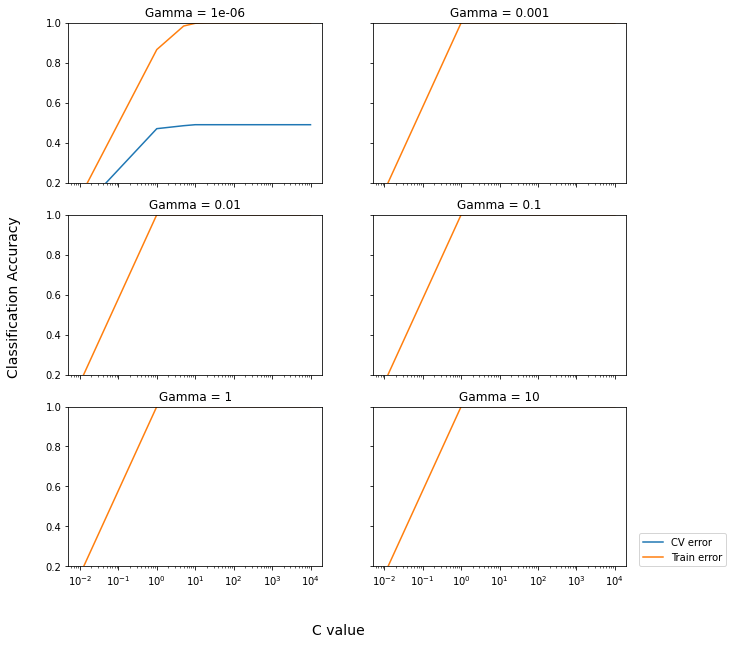

In [ ]:
#model selection takes a few minutes, change this variable
#to true to run the parameter loop
do_model_selection = True

if do_model_selection:
    C_range = np.array([.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000])
    gamma_range = np.array([0.000001, 0.001, 0.01, 0.1, 1, 10])
    
    fig, axes = plt.subplots(3, 2,
                     sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0
    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2)
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):
                                                     
            clf = SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_train,Y_train)
                                                             
            train_conf = confusion_matrix(Y_train, clf.predict(X_train))
            cv_conf = confusion_matrix(Y_validation, clf.predict(X_validation))
                                                                     
            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)
                                                                             
        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([0.2,1])
                                                                                             
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)
    
    fig.text(0.04, 0.5, 'Classification Accuracy', va='center',
             rotation='vertical', fontsize=14)

    plt.show()

In [ ]:
from sklearn.svm import SVC
SVM = SVC(C=10, gamma=1e-6)
SVM.fit(X_train, Y_train)
predictions = SVM.predict(X_validation)

In [ ]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.490099
Accuracy: 0.4900990099009901
F1 score: 0.46779552424773546
Recall: 0.4900990099009901
Precision: 0.5785496532109352

 clasification report:
               precision    recall  f1-score   support

           0       0.53      0.62      0.57        13
           1       0.67      0.50      0.57         8
          10       0.73      0.57      0.64        14
          11       0.86      1.00      0.93        19
          12       0.36      0.36      0.36        14
          13       0.00      0.00      0.00        17
           2       1.00      0.09      0.17        22
           3       0.42      0.38      0.40        13
           4       0.78      0.47      0.58        15
           5       0.75      0.50      0.60        12
           6       0.16      0.38      0.22         8
           7       0.56      0.33      0.42        15
           8       0.65      0.72      0.68        18
           9       0.26      1.00      0.41        14


# 6 Algoritmo DL 

# Escalamiento del vector de características 

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors = scaler.transform(feature_vectors)

# Segmentación de los datos para entrenamiento y pruebas

In [ ]:
from sklearn.cross_validation import train_test_split
validation_size = 0.2
seed = 0
X_train, X_validation, Y_train, Y_validation = train_test_split(feature_vectors, correct_FlowPattern_labels, test_size=validation_size, random_state=seed)

# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(solver='lbfgs', alpha=.3,
                    hidden_layer_sizes=(1000),
                   )
MLP.fit(X_train,Y_train)
predictions = MLP.predict(X_validation)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.592516
Accuracy: 0.5925155925155925
F1 score: 0.5911243785988882
Recall: 0.5925155925155925
Precision: 0.5933717323924461

 clasification report:
              precision    recall  f1-score   support

          0       0.50      0.54      0.52       151
          1       0.43      0.48      0.46       132
         10       0.53      0.62      0.57        74
         11       0.96      0.99      0.97       143
         12       0.58      0.64      0.61       147
         13       0.50      0.51      0.51       135
          2       0.67      0.68      0.68       141
          3       0.46      0.46      0.46       153
          4       0.62      0.53      0.58       131
          5       0.87      0.78      0.82       140
          6       0.47      0.39      0.43       158
          7       0.55      0.46      0.50       135
          8       0.48      0.46      0.47       151
          9       0.69      0.80      0.74       133

avg / total    

# 7. RandomForest

# Escalamiento del vector de características 

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors = scaler.transform(feature_vectors)

# Segmentación de los datos para entrenamiento y pruebas

In [ ]:
from sklearn.cross_validation import train_test_split
validation_size = 0.2
seed = 0
X_train, X_validation, Y_train, Y_validation = train_test_split(feature_vectors, correct_FlowPattern_labels, test_size=validation_size, random_state=seed)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
predictions = RF.predict(X_validation)

In [ ]:
resultados(Y_validation, predictions)

Flow Pattern classification accuracy = 0.564356
Accuracy: 0.5643564356435643
F1 score: 0.5633105203349796
Recall: 0.5643564356435643
Precision: 0.6272977088050042

 clasification report:
               precision    recall  f1-score   support

           0       0.50      0.62      0.55        13
           1       0.38      0.38      0.38         8
          10       0.62      0.57      0.59        14
          11       0.86      1.00      0.93        19
          12       0.30      0.43      0.35        14
          13       1.00      0.41      0.58        17
           2       0.71      0.45      0.56        22
           3       0.38      0.23      0.29        13
           4       1.00      0.40      0.57        15
           5       0.56      0.83      0.67        12
           6       0.24      0.62      0.34         8
           7       0.42      0.33      0.37        15
           8       0.61      0.61      0.61        18
           9       0.68      0.93      0.79        14



In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    #'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    #'max_features': [2, 3],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
RF = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, verbose=10)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START max_depth=80, n_estimators=100.............................
[CV 1/5; 1/16] END max_depth=80, n_estimators=100;, score=0.531 total time=   1.1s
[CV 2/5; 1/16] START max_depth=80, n_estimators=100.............................
[CV 2/5; 1/16] END max_depth=80, n_estimators=100;, score=0.534 total time=   1.0s
[CV 3/5; 1/16] START max_depth=80, n_estimators=100.............................
[CV 3/5; 1/16] END max_depth=80, n_estimators=100;, score=0.584 total time=   1.0s
[CV 4/5; 1/16] START max_depth=80, n_estimators=100.............................
[CV 4/5; 1/16] END max_depth=80, n_estimators=100;, score=0.578 total time=   1.0s
[CV 5/5; 1/16] START max_depth=80, n_estimators=100.............................
[CV 5/5; 1/16] END max_depth=80, n_estimators=100;, score=0.578 total time=   1.1s
[CV 1/5; 2/16] START max_depth=80, n_estimators=200.............................
[CV 1/5; 2/16] END max_depth=80, n_est

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [80, 90, 100, 110],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=10)

In [ ]:
print(grid_search.best_params_,grid_search.best_score_)

{'max_depth': 90, 'n_estimators': 1000} 0.5757303887738671


In [ ]:
predictions = grid_search.predict(X_validation)

In [ ]:
resultados(Y_validation, predictions)

Flow Pattern classification accuracy = 0.599010
Accuracy: 0.599009900990099
F1 score: 0.5995264455240431
Recall: 0.599009900990099
Precision: 0.6559400525941871

 clasification report:
               precision    recall  f1-score   support

           0       0.53      0.69      0.60        13
           1       0.50      0.50      0.50         8
          10       0.67      0.57      0.62        14
          11       0.90      1.00      0.95        19
          12       0.36      0.57      0.44        14
          13       0.86      0.35      0.50        17
           2       0.71      0.55      0.62        22
           3       0.50      0.31      0.38        13
           4       0.88      0.47      0.61        15
           5       0.60      0.75      0.67        12
           6       0.22      0.62      0.32         8
           7       0.62      0.33      0.43        15
           8       0.65      0.61      0.63        18
           9       0.74      1.00      0.85        14

  

# 8. Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
predictions =DT.predict(X_validation)

In [ ]:
resultados(Y_validation,predictions)

Flow Pattern classification accuracy = 0.465347
Accuracy: 0.46534653465346537
F1 score: 0.47417438835003173
Recall: 0.46534653465346537
Precision: 0.506709275484756

 clasification report:
               precision    recall  f1-score   support

           0       0.41      0.54      0.47        13
           1       0.06      0.12      0.08         8
          10       0.38      0.36      0.37        14
          11       0.83      0.79      0.81        19
          12       0.35      0.43      0.39        14
          13       0.50      0.35      0.41        17
           2       0.81      0.59      0.68        22
           3       0.25      0.31      0.28        13
           4       0.50      0.20      0.29        15
           5       0.60      0.75      0.67        12
           6       0.21      0.38      0.27         8
           7       0.40      0.27      0.32        15
           8       0.50      0.44      0.47        18
           9       0.67      0.71      0.69        14

# Ejercicio

Realizar optimización de parametros sobre DT

# Evaluación inicial del compartamiento de cada uno de los modelos

In [ ]:
seed = 42
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.445463 (0.040312)
LDA: 0.124012 (0.036993)
KNN: 0.114120 (0.020512)
NB: 0.275386 (0.027040)
SVM: 0.404429 (0.041114)
MLP: 0.187346 (0.017884)
RF: 0.428056 (0.040568)
DT: 0.346265 (0.046600)


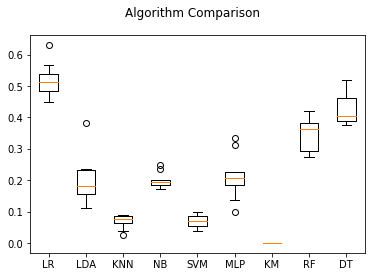

In [ ]:
# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 9. Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
one_hot_labels_train = keras.utils.to_categorical(Y_train, num_classes=14)
one_hot_labels_validation = keras.utils.to_categorical(Y_validation, num_classes=14)

In [ ]:
one_hot_labels_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                6464      
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 200)               25800     
                                                                 
 dense_17 (Dense)            (None, 64)                12864     
                                                                 
 dense_18 (Dense)            (None, 14)                910       
                                                                 
Total params: 54,358
Trainable params: 54,358
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
9/9 [=============================

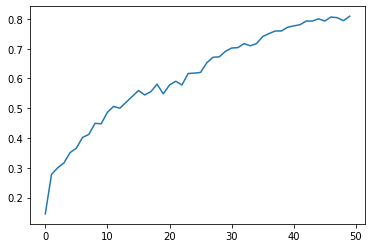

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',))
model.add(Dense(200, activation='relu',))
#model.add(Dense(200, activation='relu',))
model.add(Dense(64, activation='relu',))
#model.add(Dense(100, activation='relu',))
#model.add(Dense(8000, activation='relu',))
#model.add(Dropout(0.5))
#model.add(Dense(1000, activation='tanh',))
#model.add(Dense(100, activation='relu',))
model.add(Dense(14, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'mse','mae','mape'])  

# summarize layers
print(model.summary())

# Convert labels to categorical one-hot encoding
#one_hot_labels_train = keras.utils.to_categorical(Y_train, num_classes=14)

# Train the model, iterating on the data in batches of 32 samples
history=model.fit(X_train, one_hot_labels_train, epochs=50, batch_size=100)
#plt.subplot(2,2,1)
plt.plot(history.history['acc'])
#plt.subplot(2,2,2)
#plt.plot(history.history['mse'])
#plt.subplot(2,2,3)
#plt.plot(history.history['mae'])
#plt.subplot(2,2,4)
#plt.plot(history.history['mape'])
plt.show()

In [ ]:
score = model.evaluate(X_validation, one_hot_labels_validation, batch_size=64)
score

4/4 [==============================] - 0s 6ms/step - loss: 6.7164 - acc: 0.3317 - mse: 0.0739 - mae: 0.0984 - mape: 49190184.0000


[6.716403484344482,
 0.3316831588745117,
 0.07389137148857117,
 0.09838036447763443,
 49190184.0]

# 10. Auto Machine Learning 

In [ ]:
# First install package from terminal:
# pip install -U pip
# pip install -U setuptools wheel
# pip install autogluon  # autogluon==0.4.0

from autogluon.tabular import TabularDataset, TabularPredictor
train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
test_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')

Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv | Columns = 15 / 15 | Rows = 39073 -> 39073
Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv | Columns = 15 / 15 | Rows = 9769 -> 9769


In [ ]:
print(train_data.head())

   age   workclass  fnlwgt   education  education-num       marital-status  \
0   25     Private  178478   Bachelors             13        Never-married   
1   23   State-gov   61743     5th-6th              3        Never-married   
2   46     Private  376789     HS-grad              9        Never-married   
3   55           ?  200235     HS-grad              9   Married-civ-spouse   
4   36     Private  224541     7th-8th              4   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Tech-support       Own-child   White   Female             0   
1    Transport-moving   Not-in-family   White     Male             0   
2       Other-service   Not-in-family   White     Male             0   
3                   ?         Husband   White     Male             0   
4   Handlers-cleaners         Husband   White     Male             0   

   capital-loss  hours-per-week  native-country   class  
0             0              40   United

In [ ]:
print(train_data.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  39073.000000  3.907300e+04   39073.000000  39073.000000  39073.000000   
mean      38.616743  1.899605e+05      10.078085   1117.146802     88.002866   
std       13.718529  1.055563e+05       2.569742   7701.078403    403.732117   
min       17.000000  1.349200e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.177740e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783410e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.383420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    39073.000000  
mean        40.407673  
std         12.362809  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [ ]:
predictor = TabularPredictor(label='class').fit(train_data, time_limit=120)  # Fit models for 120s

No path specified. Models will be saved in: "AutogluonModels/ag-20220408_043438/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20220408_043438/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    39073
Train Data Columns: 14
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [' <=50K', ' >50K']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive ( >50K) vs negative ( <=50K) class.
	To explicitly set the positive_class, either rename classes to 1 

In [ ]:
performance = predictor.evaluate(test_data)

Evaluation: accuracy on test data: 0.8767529941652165
Evaluations on test data:
{
    "accuracy": 0.8767529941652165,
    "balanced_accuracy": 0.795126057397256,
    "mcc": 0.6406203577595788,
    "roc_auc": 0.9297192332441957,
    "f1": 0.7112709832134292,
    "precision": 0.800755939524838,
    "recall": 0.6397756686798964
}


In [ ]:
leaderboard = predictor.leaderboard(test_data)

                  model  score_test  score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2    0.876753     0.8864        1.392325       0.443720  71.705051                 0.059249                0.005404           1.351176            2       True         12
1              CatBoost    0.875627     0.8836        0.039340       0.025799  36.035641                 0.039340                0.025799          36.035641            1       True          7
2              LightGBM    0.873477     0.8824        0.370032       0.053497   1.951005                 0.370032                0.053497           1.951005            1       True          4
3            LightGBMXT    0.871430     0.8792        0.280367       0.075792   2.768765                 0.280367                0.075792           2.768765            1       True          3
4               XGBoost    0.868871     

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2     0.8864       0.443720  71.705051                0.005404           1.351176            2       True         12
1              CatBoost     0.8836       0.025799  36.035641                0.025799          36.035641            1       True          7
2              LightGBM     0.8824       0.053497   1.951005                0.053497           1.951005            1       True          4
3            LightGBMXT     0.8792       0.075792   2.768765                0.075792           2.768765            1       True          3
4               XGBoost     0.8720       0.027042   0.668326                0.027042           0.668326            1       True         11
5      RandomForestGini     0.8640       0.312669   9.969909                0.312669           9.969909 

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.7752,
  'KNeighborsDist': 0.766,
  'LightGBMXT': 0.8792,
  'LightGBM': 0.8824,
  'RandomForestGini': 0.864,
  'RandomForestEntr': 0.8608,
  'CatBoost': 0.8836,
  'ExtraTreesGini': 0.8496,
  'ExtraTreesEntr': 0.8496,
  'NeuralNetFastAI': 0.8628,
  'XGBoost': 0.872,
  'WeightedEnsemble_L2': 0.8864},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'AutogluonModels/ag-20220408_043438/models/KNeighborsUnif/',
  'KNeighborsDist': 'AutogluonModels/ag-20220408_043438/models/KNeighborsDist/',
  'LightGBMXT': 'Autogluon

# Ejercicio 1
Probar multiples codificaciones incluida K-mers para probar sobre el archivo de prueba y mostrar el mejor resultado, adicional utilizar la operación grid search para realizar optimización de párametros

# Ejercicio 2

Tomar el base de datos de 11 tumores a partir de microarrays de expresión genica y clasificarlos con los algoritmos vistos en este notebook incluido optimización de páramteros

# Ejercicio 3

Tomar el base de datos de gioblastoma y clasificarlos con los algoritmos vistos en este notebook incluido optimización de páramteros

# Ejercicio 4
Utilizar autoglon (auto Machine learning) para la base de datos de LTR en una codifiación particular